In [2]:
%matplotlib inline

import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')

df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1


In [5]:
clean_df=df.drop('FantasyPoints', axis=1)
clean_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player        626 non-null    object
 1   Tm            626 non-null    object
 2   Pos           578 non-null    object
 3   Age           626 non-null    int64 
 4   G             626 non-null    int64 
 5   GS            626 non-null    int64 
 6   Tgt           626 non-null    int64 
 7   Rec           626 non-null    int64 
 8   PassingYds    626 non-null    int64 
 9   PassingTD     626 non-null    int64 
 10  PassingAtt    626 non-null    int64 
 11  RushingYds    626 non-null    int64 
 12  RushingTD     626 non-null    int64 
 13  RushingAtt    626 non-null    int64 
 14  ReceivingYds  626 non-null    int64 
 15  ReceivingTD   626 non-null    int64 
 16  Int           626 non-null    int64 
 17  Fumbles       626 non-null    int64 
 18  FumblesLost   626 non-null    int64 
dtypes: int64

In [6]:
def get_usage(row):
    games = row['G']
    if row['Pos'] == 'RB' or row['Pos'] == 'WR' or row['Pos'] == 'TE':
        return (row['Tgt'] + row['RushingAtt'])/games
    else:
        return (row['PassingAtt'] + row['RushingAtt'])/games

clean_df['Usage/G'] = clean_df.apply(get_usage, axis=1)

clean_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,Usage/G
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,0,3,2,25.562500
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,0,1,0,19.600000
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,0,5,3,26.142857
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,0,1,1,9.666667
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,0,1,1,10.642857


In [7]:
scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'Rec': 0.5,
    'PassingYds': 0.04,
    'PassingTD': 4,
    'Int': -2
}

def get_fantasy(row):
    games = row['G']
    fantasy_points = sum([row[column]*weight for column, weight in scoring_weights.items()])
    return fantasy_points/games

clean_df['FantasyPoints/G'] = clean_df.apply(get_fantasy, axis = 1)

clean_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,Usage/G,FantasyPoints/G
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,0,3,2,25.562500,20.100000
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,0,1,0,19.600000,22.420000
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,0,5,3,26.142857,22.128571
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,0,1,1,9.666667,17.217333
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,0,1,1,10.642857,21.492857


clean_df now represents are cleaned data for QB, WR, RB, and TE including usage/game and fantasy points/game. I have broken clean_df up into 5 additionals df of rb only, wr only, te only, qb only, and flex.

In [8]:
rb_df = clean_df.loc[clean_df.Pos == 'RB']
wr_df = clean_df.loc[clean_df.Pos == 'WR']
te_df = clean_df.loc[clean_df.Pos == 'TE']
qb_df = clean_df.loc[clean_df.Pos == 'QB']
flex_df = clean_df.loc[clean_df.Pos != 'QB']

flex_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,Usage/G,FantasyPoints/G
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,0,3,2,25.562500,20.100000
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,0,1,0,19.600000,22.420000
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,0,5,3,26.142857,22.128571
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,0,1,1,9.666667,17.217333
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,0,1,1,10.642857,21.492857


In [18]:
rb_df.head(20)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,Usage/G,FantasyPoints/G
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,0,3,2,25.562500,20.100000
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,0,1,0,19.600000,22.420000
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,0,5,3,26.142857,22.128571
11,Jonathan Taylor,IND,RB,21,15,13,39,36,0,0,0,1169,11,232,299,1,0,1,1,18.066667,15.653333
12,Aaron Jones,GNB,RB,26,14,14,63,47,0,0,0,1104,9,201,355,2,0,2,0,18.857143,16.814286
14,David Montgomery,CHI,RB,23,15,14,68,54,0,0,0,1070,8,247,438,2,0,1,1,21.000000,15.720000
17,James Robinson,JAX,RB,22,14,14,60,49,0,0,0,1070,7,240,344,3,0,3,1,21.428571,15.992857
18,Josh Jacobs,LVR,RB,22,15,15,45,33,0,0,0,1065,12,273,238,0,0,2,2,21.200000,14.320000
21,Nick Chubb,CLE,RB,25,12,12,18,16,0,0,0,1067,12,190,150,0,0,1,1,17.333333,16.641667
30,Kareem Hunt,CLE,RB,25,16,5,51,38,0,0,0,841,6,198,304,5,0,2,0,15.562500,12.468750


<Figure size 576x576 with 0 Axes>

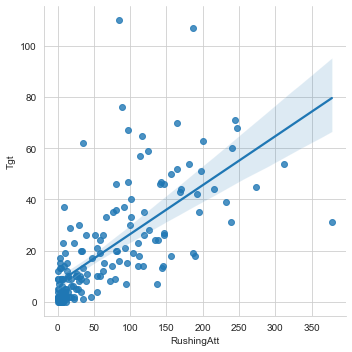

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 8))

sns.lmplot(data = rb_df, x = 'RushingAtt', y = 'Tgt')

Text(0.5, 1.0, 'Rushing Attempts vs. Targets for RBs 2020')

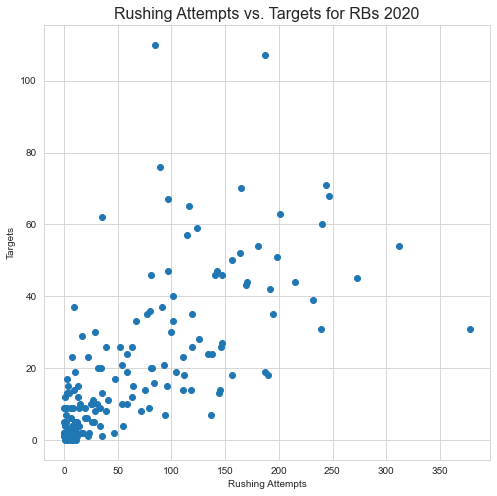

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(data=rb_df, x='RushingAtt', y='Tgt')
plt.xlabel('Rushing Attempts')
plt.ylabel('Targets')
plt.title('Rushing Attempts vs. Targets for RBs 2020', fontsize=16)

<AxesSubplot:xlabel='Usage/G', ylabel='FantasyPoints/G'>

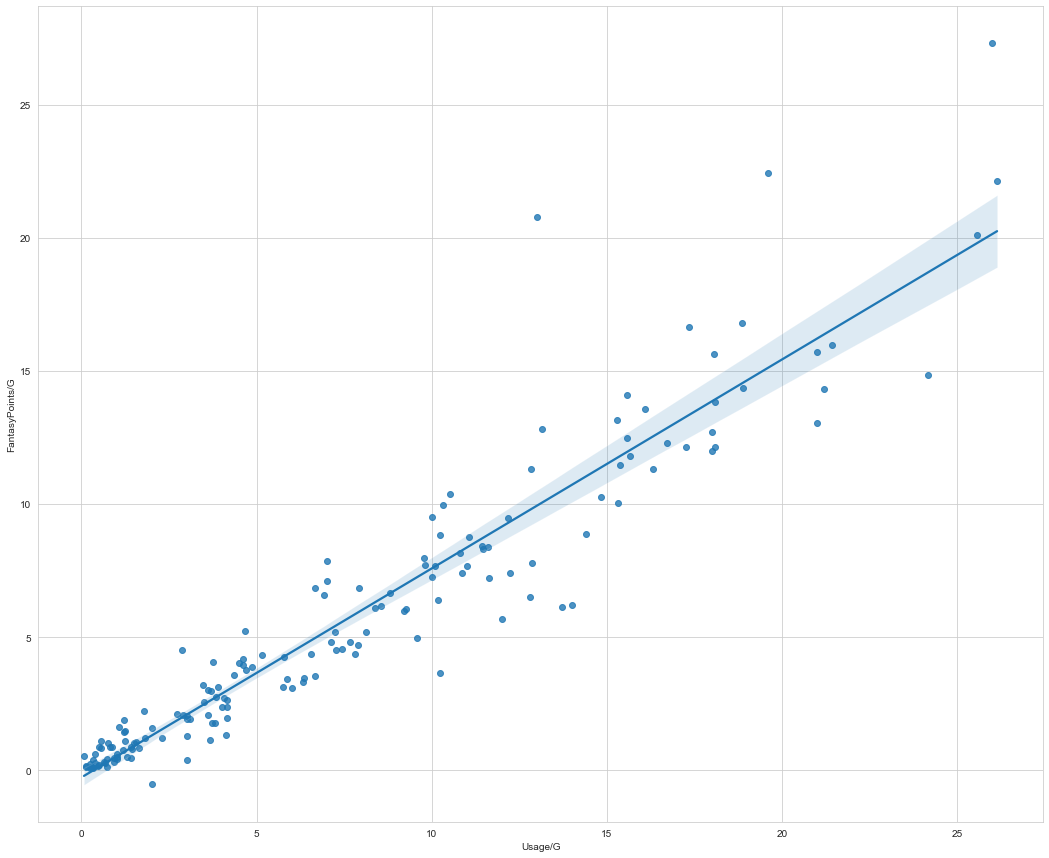

In [11]:
plt.figure(figsize=(18,15))
sns.regplot(data=rb_df, x='Usage/G', y='FantasyPoints/G')

/Users/brandynklee/Python_Projects/fantasy_footballl_22/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tgt', ylabel='Density'>

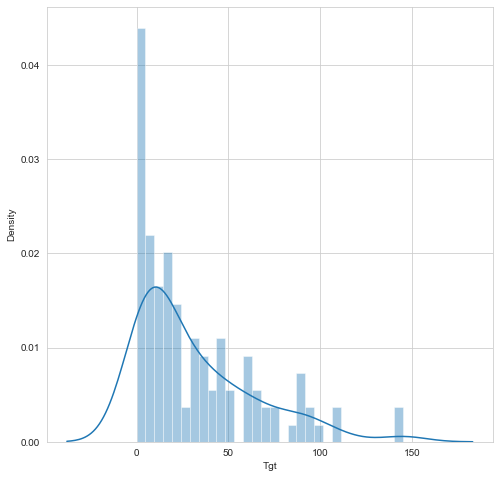

In [16]:
plt.figure(figsize=(8,8))
sns.distplot(te_df['Tgt'], bins=30)

<AxesSubplot:xlabel='Tgt', ylabel='Count'>

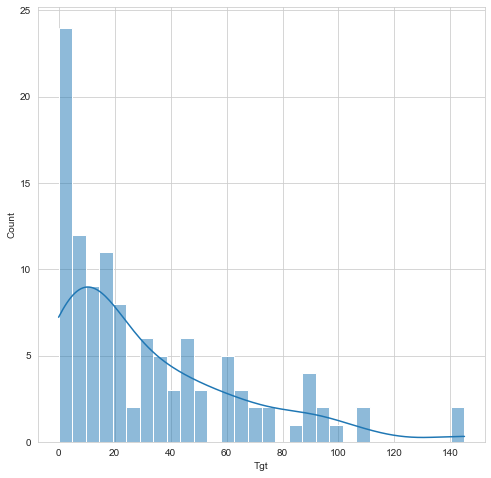

In [17]:
plt.figure(figsize=(8,8))
sns.histplot(te_df['Tgt'], bins=30, kde=True)

Bivariate Kernel Density Estimation Plot - plotting of kernel density estimations for two dimensions by passing in two datafram columns

In the example below, the density estimation for rushing attempts and targets. Some players are marked to illustrate player performances within the plot.

<AxesSubplot:xlabel='RushingAtt', ylabel='Tgt'>

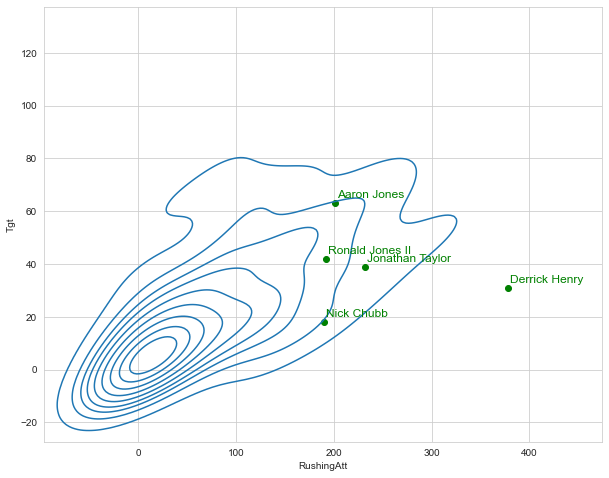

In [22]:
fig, ax = plt.subplots(figsize=(10,8))

plot_players = [
    'Derrick Henry', 'Aaron Jones', 'Nick Chubb', 'Ronald Jones II', 'Jonathan Taylor'
]

for p_name in plot_players:
    player = rb_df.loc[rb_df['Player'] == p_name]

    if not player.empty:
        targets = player['Tgt']
        rushes = player['RushingAtt']

        ax.annotate(p_name, xy=(rushes+2,targets+2), color = 'green', fontsize=12)
        ax.scatter(rushes, targets, color='green')
# set ax parameter to ax we created above
sns.kdeplot(data = rb_df, x = 'RushingAtt',y = 'Tgt', ax=ax)

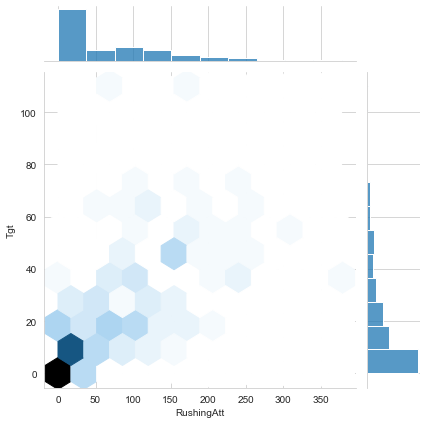

In [25]:
sns.jointplot(data = rb_df, x= 'RushingAtt', y='Tgt', kind='hex')


# the kind variable can be replaced with 'kde' (kernel density estimation - probability density function of a random variable)

Residual Plots show us the difference between our regression model (line of best fit) and the actual data points on the xy plane.

The difference between the predicted value and the real world value is called the residual. Essentially a residual demonstrates to us how strong our line of best fit was.

Seaborn built in capabilities demonstrated below gives us a quick way to plot the residduals for a line of best fit between two variables.

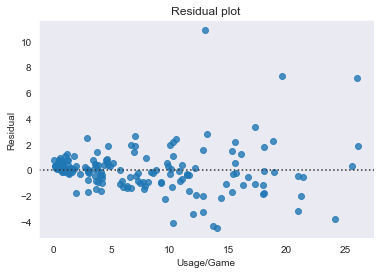

In [26]:
sns.set_style('dark') # changing up the style

sns.residplot(data=rb_df, x= 'Usage/G', y='FantasyPoints/G')
plt.title('Residual plot')
plt.xlabel('Usage/Game') # this is how we set an x label in matplotlib
plt.ylabel('Residual') # this is how we set a y label in matplotlib
plt.show() # show our plot

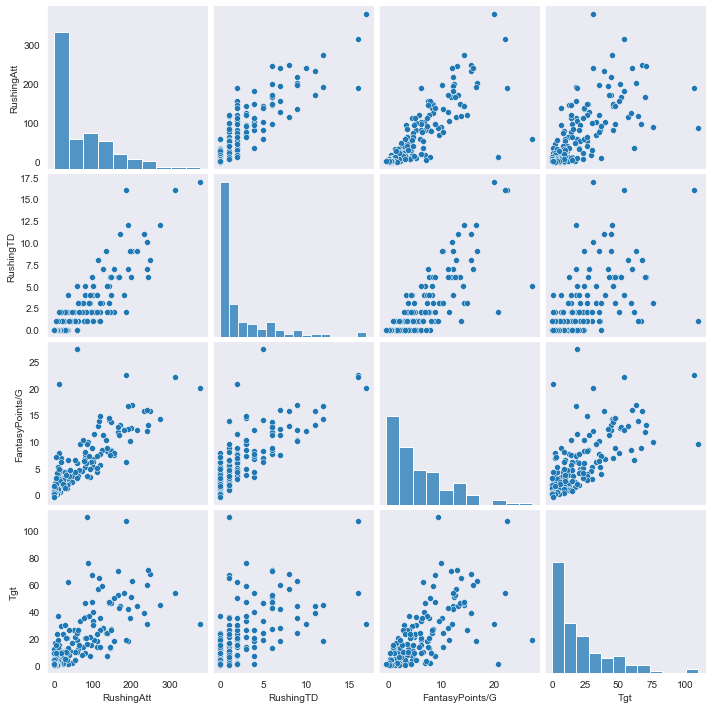

In [27]:
rb_copy_df = rb_df[[
    'RushingAtt', 'RushingTD', 'FantasyPoints/G', 'Tgt'
]]

sns.pairplot(data=rb_copy_df)